In [60]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.cluster import KMeans


In [52]:
data = pd.read_csv('weatherAUS.csv')
data.drop('Date',axis = 1 ,inplace = True)
data.drop('Location',axis = 1 ,inplace = True)
data.drop('WindGustDir' ,axis =1, inplace=True)
data.drop('WindDir3pm' ,axis =1, inplace=True)
data.drop('WindDir9am' ,axis =1, inplace=True)
data.replace('Yes',1,inplace=True)
data.replace('No',0,inplace=True)
data.fillna(0,inplace = True)
data = (data - data.mean())/data.std()

In [53]:
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis =1)


In [54]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [55]:
def new_centroids(data, labels):
    centroids = data.groupby(labels).mean().T
    return centroids


In [56]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels)
    iteration +=1
print(labels)
    

0         0
1         0
2         1
3         0
4         1
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Length: 145460, dtype: int64


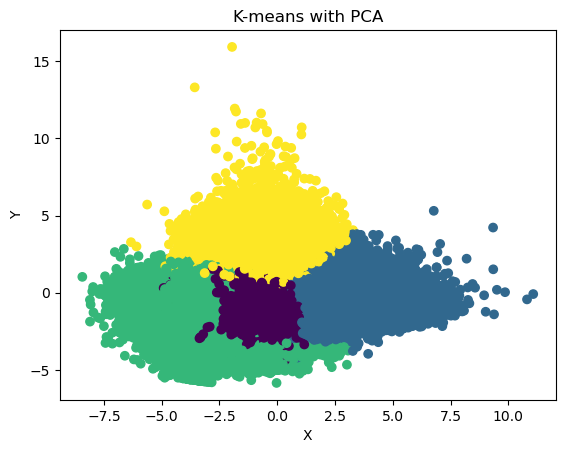

In [58]:
pca = PCA(n_components=8)
data_pca = pca.fit_transform(data)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.title('K-means with PCA')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

/Users/sarvesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sarvesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sarvesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sarvesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sarve

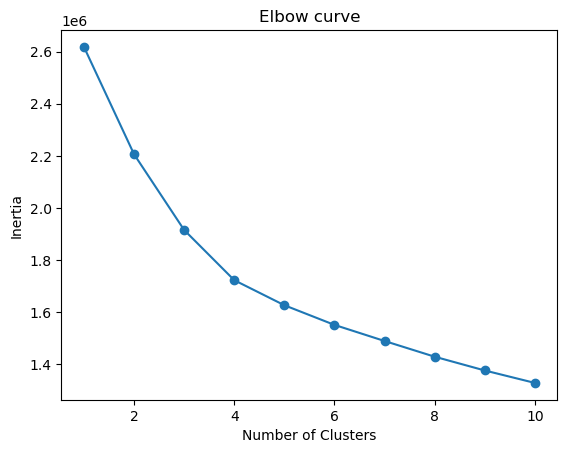

In [66]:
def calculate_inertia(data, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    return kmeans.inertia_


max_clusters = 10
inertia_values = []
for k in range(1,max_clusters+1):
    inertia_value = calculate_inertia(data, k)
    inertia_values.append(inertia_value)

    
plt.plot(range(1, max_clusters+1), inertia_values, marker='o')
plt.title('Elbow curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
